## Determining most Satisfied Employees By Age and Service category

In this project we'll be analyzing employees exit surveys from [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) Department of Education, Training and Employment and [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) the Technical and Further Education institute in Queensland, Australia.

The two datasets comprises of information about employees and their reasons for resigning. 

In this project we will be answering the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Results
 At the end of the analysis we found out that younger and less experienced employees are more satisfied with their jobs.

  ## Packages Requirements
In this project we will be using the following Python packages:

* Pandas.
* NumPy.
* Matplotlib.
* Seaborn.

### Data Exploration

The first thing is to read in/import our datasets to get familiar with it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Read in both datasets
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')


## Columns Information

We will take a look at the columns to get familiar with them


In [2]:
# DETE survey
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# TAFE survey
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


##### Removing Columns

Since not all columns will be needed for our analysis therefore, we will be removing these columns from our datasets

In [4]:
#Removing Dete_survey columns
dete_survey_new = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#Removing Tafe_survey columns
tafe_survey_new = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

##### Renaming Column Names

A lot of columns in both datasets have contents/values of the same meaning, but the columns are named differently. We will eventually combine both datasets, so it is essential to standardize the columns' names.

In [5]:
#Renaming Dete_survey columns
dete_survey_new.columns = dete_survey_new.columns.str.replace(" ","_").str.strip().str.lower()
dete_survey_new

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,False,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN


##### Renaming TAFE columns

Because i eventually want to combine the dataframe, i'll have to standardize the column names. Below i rename the columns so that it can corresponds to the first data frame (DETE) column names.

In [6]:
new_cols = {
    'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}


tafe_survey_new = tafe_survey_new.rename(new_cols, axis=1)
tafe_survey_new.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


##### Filtering Our Data For Resignation Variable

Since in this project we will be answering the following questions:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been at the job longer? 

Therefore, we are only concerned about the <b>Resignation</b> unique variable in the <b>SeparationType</b> column

Let's use the Series.value_counts() method to look at the unique values in the separationtype columns in both datasets.

In [7]:
# DETE separation types
dete_survey_new['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [8]:
# TAFE separation types
tafe_survey_new['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

Below we will retrieve the Resignation elements from the separationtype column and store it in the dete_resignations variable We can accomplish it by using regular expressions and the pandas Series.str.contains() method.

In [9]:
# Retrieve resignation data from DETE survey
dete_resignations = dete_survey_new[dete_survey_new["separationtype"].str.contains("Resignation")].copy()

# Check if the data is correct
dete_resignations["separationtype"].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [10]:
# Retrieve resignation data from TAFE survey
tafe_survey_new = tafe_survey_new[tafe_survey_new["separationtype"].notna()].copy() # Drop NaN values
tafe_resignations = tafe_survey_new[tafe_survey_new["separationtype"].str.contains("Resignation")]

# Check if the data is correct
tafe_resignations["separationtype"].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

### Checking for Logical Inconsistencies
It is of great importance to check if our data makes sense and to remove all logical inconsistencies.
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

First of all, let's have a look at the cease_date columns in the DETE survey. It contains dates when employees started and finished work so if a date is after July 2019 (the most recent dataset update) it makes no sense and we have to remove these rows.

In [11]:
# Unique values in the dete cease_date column
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

The above outcome shows that our data is correct since it ranges between 2006-2014

Using the Vectorized string methods to extract only the year, convert it to float and asign it back to the cease_date column

In [12]:
# Extracting the year and converting it to float type
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

# Check if the data is correct
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

We will have to look at the dete_start_date column in the DETE survey to see if everything is normal, note that the start date must not be before 1940

In [13]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

We will plot a box plot of the dete state_date column in the DETE survey to see if there are any outliers.

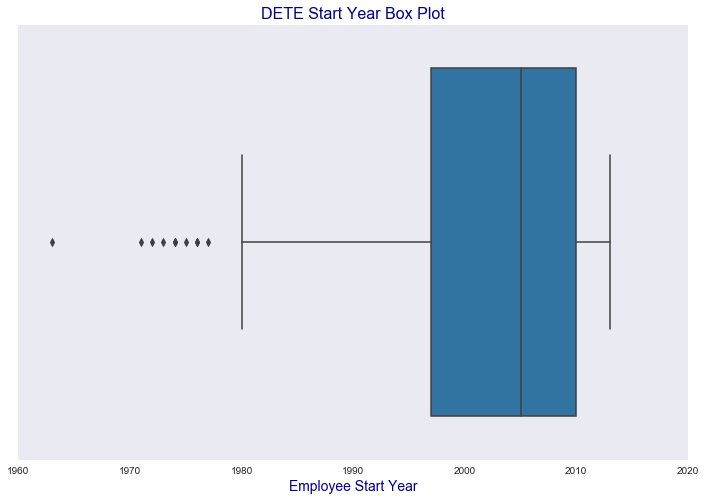

In [14]:
# Plot
plt.figure(figsize=(12, 8))
sns.set_style("dark")
box_plot = sns.boxplot(dete_resignations["dete_start_date"])

# Plot aesthetics
plt.title("DETE Start Year Box Plot", fontsize=16, color='darkblue')
plt.xlabel("Employee Start Year", fontsize=14, color='darkblue')
plt.xlim(1960, 2020)

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

We wil remove 1963 because it is an outlier, of which we will exclude from the further analysis.

In [15]:
dete_resignations = dete_resignations[~(dete_resignations["dete_start_date"] == 1963.0)]

We will now check the cease_date column in the TAFE survey

In [16]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

### Creating New Columns
Our questions is:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been at the job longer?

To answer this question we need to calculate the period an employee was in service. In the TAFE survey we already have the column called institute_service that contains years of service at a company. In order to combine the datasets, we need to create a corresponding column in the DETE survey. We can do this by subtracting dete_start_date from cease_date as follows

In [17]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations[["cease_date", "dete_start_date", "institute_service"]].head()

,cease_date,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0


One of our questions is to verify if employees resign because of some kind of dissatisfaction. In both datasets we may identify columns that describe dissatisfaction.

For DETE Survey:

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

For TAFE Survey:

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

In the TAFE survey we will convert all values in both columns in either True, False or NaN. We will use the DataFrame.any() method to create a new column called dissatisfied and to fill it with True, False or NaN based on the values in Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction.

This approach will combine information from both columns and simplify our analysis.

In [18]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will create a function that does the following:

* If the value is NaN, return np.nan.
* If the value is "-", return False. Since there are already some missing values, we can't treat hyphens as NaN values.
* For other values, return True.


In [20]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

We now apply this function to both columns using the DataFrame.applymap() method.

In [21]:
tafe_resignations_up = tafe_resignations.copy() # Create a copy to avoid the SettingwithCopy warning
tafe_resignations_up["Contributing Factors. Dissatisfaction"] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [22]:
# Use any() method
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[[
    "Contributing Factors. Dissatisfaction",
    "Contributing Factors. Job Dissatisfaction"
]].any(axis=1, skipna=False)

# Check if the data is correct
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Recall that all columns in dete_survey_updated that interest us have the bool type so we can directly apply the DataFrame.any() method. We will create a new column called dissatisfied to be able to combine both datasets.

In [23]:
# Apply any() method
dete_resignations["dissatisfied"] = dete_resignations[[
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]].any(axis=1, skipna=False)

# Create a copy to avoid the SettingwithCopy warning
dete_resignations_up = dete_resignations.copy()

# Check if the data is correct
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    161
True     149
Name: dissatisfied, dtype: int64

### Combining the Datasets
Now we are ready to combine our datasets in order to start answering the questions.

We will first add a column with institute name to each dataset in order to distinguish them after combining.

In [24]:
# Add institute column to the DETE survey
dete_resignations_up["institute"] = "DETE"

# Add institute column to the TAFE survey
tafe_resignations_up["institute"] = "TAFE"


In [25]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [26]:
combined = combined.dropna(thresh=500, axis=1)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
age                  595 non-null object
cease_date           634 non-null float64
dissatisfied         642 non-null object
employment_status    596 non-null object
gender               591 non-null object
id                   650 non-null float64
institute            650 non-null object
institute_service    562 non-null object
position             597 non-null object
separationtype       650 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


In [27]:
combined.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


### More Data Cleaning
Recall one of our questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
To answer it we need information from the institute_service column. Let's have a look at it.

In [28]:
combined["institute_service"].value_counts(dropna=False).head()

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
Name: institute_service, dtype: int64

We will create a functions to splits it into four categories following these criteria:

* <b> New:</b> Less than 3 years at a company
* <b> Experienced:</b> 3-6 years at a company
* <b> Established:</b> 7-10 years at a company
* <b> Veteran:</b> 11 or more years at a company

These are slightly modified categories from an [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) on businesswire.com, that consider years of employees' experience rather than their age.

In [29]:
combined['institute_service'] = combined['institute_service'].astype(str).str.extract(r"(\d+)")
combined['institute_service'] = combined['institute_service'].astype(float)


combined["institute_service"].value_counts(dropna=False).sort_index()                           

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
NaN      88
Name: institute_service, dtype: int64

Now we will write a function that splits values into the categories we defined above.

In [30]:
def service_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val < 7:
        return 'Experienced'
    elif val >= 7 and val < 11:
        return 'Established'
    else:
        return 'Veteran'

In [31]:
combined['service_cat'] = combined['institute_service'].apply(service_cat)

# Check if the data is correct
combined["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        135
NaN             88
Established     62
Name: service_cat, dtype: int64

# Analysis and Visualization

In [32]:
combined["dissatisfied"].value_counts(dropna=False)

False    402
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [33]:
# Fill NaN values with False
combined["dissatisfied"] = combined["dissatisfied"].fillna(False)

# Check if the data is correct
combined["dissatisfied"].value_counts(dropna=False)

False    410
True     240
Name: dissatisfied, dtype: int64

### Job Dissatisfaction by Service Category
<b> Our first question is:</b >

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

We will now use pivot tables to aggregate the data and calculate percentage of dissatisfied employees in each category of the service_cat group. Then we will visualize the findings with a bar plot. We will also write a function to annotate all our future bar plots.

In [34]:
pv_dissatisfied_service = combined.pivot_table(values="dissatisfied", index="service_cat")

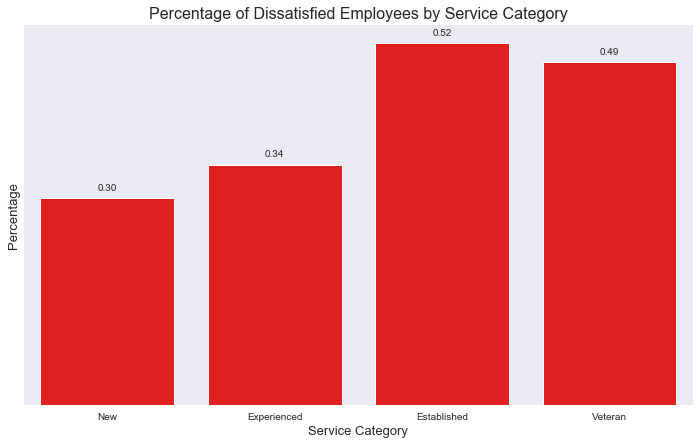

In [35]:
# Pivot table: dissatisfed by service category
pv_dissatisfied_service = combined.pivot_table(
    values="dissatisfied",
    index="service_cat"
)

# Reorder the service categories
serv_order = ["New", "Experienced", "Established", "Veteran"]
pv_dissatisfied_service = pv_dissatisfied_service.reindex(serv_order)

# Reset the pivot table indexes
pv_dissatisfied_service.reset_index(inplace=True)

# Bar plot of the pivot table
plt.figure(figsize=(12,7))
sns.set_style("dark")

plt_serv = sns.barplot(
    x="service_cat",
    y="dissatisfied",
    data=pv_dissatisfied_service,
    color="red"
)

# Improve the plot aesthetics
plt.title("Percentage of Dissatisfied Employees by Service Category", fontsize=16)
plt.xlabel("Service Category", fontsize=13)
plt.ylabel("Percentage", fontsize=13)
plt.yticks([])

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

# Function for plot annotation
def annotate(plot, rd=".2f"):
    for p in plot.patches:
            plot.annotate(format(p.get_height(), rd), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha = "center", 
                    va = "center", xytext = (0, 10), 
                    textcoords = "offset points"
                  )
            
# Annotate the plot
annotate(plt_serv)

The analysis above shows that __Established__ and __Veteran__ empoyees are most dissatisfied with their job, that is those who have worked for the company for between 7 years and above
Which means those are the employees likely to resign due to som er kind of dissatisfaction

### Job Dissatisfaction By Generation (Age)

Second question:

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
In order to answer this question we have to:

* Clean the age column.
* Split the data into generational groups.
* Group by the generational groups and plot the results. Let's start by looking at the age column.

In [36]:
combined["age"].value_counts(dropna=False)


51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      22
20 or younger    10
Name: age, dtype: int64

We will group the ages according to the generational groups from this [Site](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). Both datasets were updated in 2019, so we will have to take it into consideration.

We will extract only the first ages in case there is a range of them.

In [37]:
# Extract the first age and convert it to float type
combined["age_up"] = combined["age"].str.extract(r"(\d+)")
combined["age_up"] = combined["age_up"].astype(float)

# Check if the data is correct
combined["age_up"].value_counts(dropna=False).sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    22
NaN     55
Name: age_up, dtype: int64

Now we will declare a function splits the data into generational groups following these criteria:

* Baby Boomers: 55 and older.
* Gen X: 40-54 years.
* Millennials: 25-39 years.
* Gen Z: 24 and younger.

In [38]:
# Function to split ages into generational groups
def age_cats(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 24:
        return "Gen Z"
    elif age > 24 and age <= 39:
        return "Millennials"
    elif age > 39 and age <= 54:
        return "Gen X"
    else:
        return "Baby Boomers"
    
# Apply the function to the age_cat column
combined["age_cats"] = combined["age_up"].apply(age_cats)

# Check if the data is correct
combined["age_cats"].value_counts(dropna=False)

Gen X           245
Millennials     201
Baby Boomers     77
Gen Z            72
NaN              55
Name: age_cats, dtype: int64

In [39]:
generation = combined.pivot_table(index='age_cats', values='dissatisfied', aggfunc='mean')

In [40]:
#reodering generation
gen_order = ['Baby Boomers', 'Gen X', 'Millennials', 'Gen Z']
percentage_by_gen = generation.reindex(gen_order)

[]

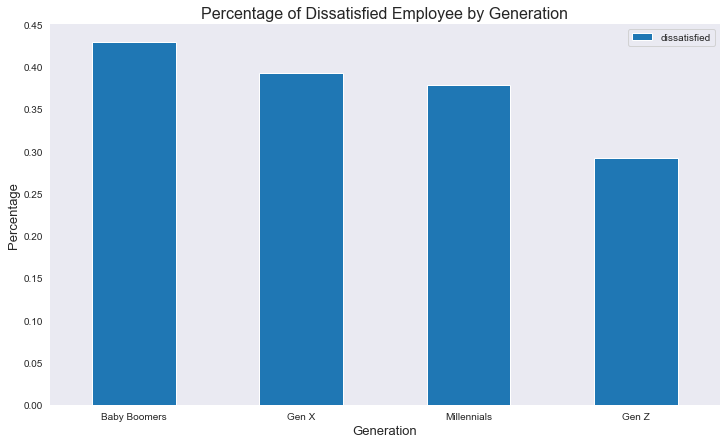

In [41]:
percentage_by_gen.plot(kind='bar', figsize=(12,7))
plt.title('Percentage of Dissatisfied Employee by Generation', fontsize=16)
plt.xticks(rotation=0)
plt.xlabel('Generation', fontsize=13)
plt.ylabel('Percentage', fontsize=13)

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)
plt.plot()

### Percentage of Dissatisfied Employee By Service Category and Generation

In [42]:
service_cat_generation = combined.pivot_table(values='dissatisfied', index='age_cats', columns='service_cat', fill_value=0)

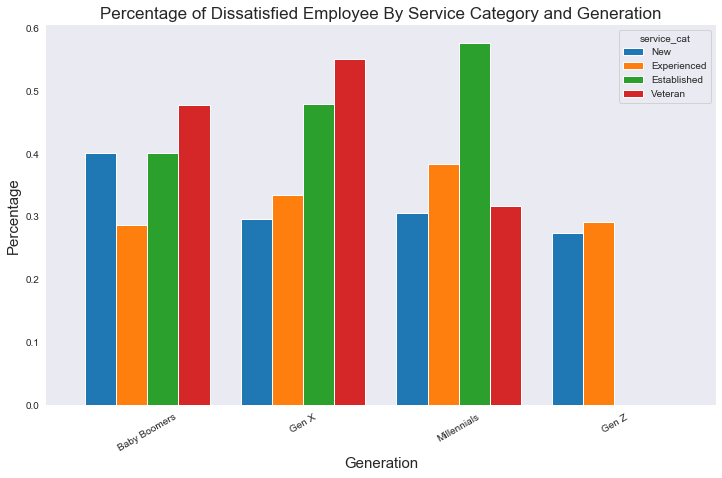

In [43]:
#reordering
service_cat_generation = service_cat_generation.reindex(gen_order)

#reindexing
service_cat_generation = service_cat_generation[serv_order]

#plotting
service_cat_generation.plot(kind='bar', figsize=(12,7), rot=30, width=0.8,)
plt.title('Percentage of Dissatisfied Employee By Service Category and Generation', fontsize=17)
plt.xlabel('Generation', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)
plt.show()

The visualization above shows that most veterans of Baby Boomers and Gen X are dissatisfied groups of employees, whereas between Millennials the Established are the most dissatisfied. And finally Gen Z is the most satisfied generation independently of their experience.

Checking the Data Reliability
It is imperative for us to check if our data is reliable. To do this we will check if our groups are big enough to be a representative sample. It is generally accepted that a sample should have at least 30 individuums/objects to provide robust statistics.

Since we already know that each service category and generational group has enough employees. We will need to check each group that combines both service category and generational group (ex. Baby Boomers veterans) one by one.

In [44]:
# Pivot table: dimension of each group
pv_bias = combined.pivot_table(
    values="dissatisfied",
    index="age_cats",
    columns="service_cat",
    fill_value=0,
    aggfunc=lambda x: len(x)
)

# Reindex
pv_bias = pv_bias.reindex(gen_order)

# Reorder the columns
pv_bias = pv_bias[serv_order]

# Show the pivot table
pv_bias

service_cat,New,Experienced,Established,Veteran
age_cats,,,,
Baby Boomers,5,14,5,44
Gen X,71,66,23,71
Millennials,72,68,33,19
Gen Z,44,24,1,0


At a glance there are some groups that are too small to provide reliable data. Let's visualize the numbers to have a better overview

<Figure size 864x504 with 0 Axes>

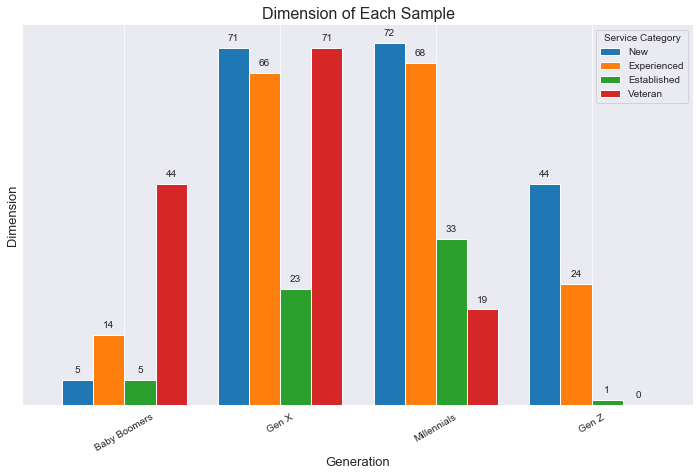

In [45]:
# Bar plot of the pivot table
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")

plt_bias = pv_bias.plot(
    kind="bar", 
    figsize=(12,7), 
    rot=30, 
    width=0.8,
)

# Improve the plot aesthetics
plt.title("Dimension of Each Sample", fontsize=16)
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Dimension", fontsize=13)
plt.yticks([])
plt.legend(title="Service Category", fontsize="medium")

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

# Annotate the plot
annotate(plt_bias, rd=".0f")

The following groups can provide robust statistics:

1. New from Gen X, Millennials and Gen Z.
2. Experienced from Gen X and Millennials.
3. Established from Millennials.
4. Veterans from Baby Boomers and Gen X.

### Conclusions
In this project, we analyzed two exit surveys done by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
We have answered two questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees? We now know that the most experienced employees are least satisfied with their jobs. We also know that Baby Boomers followed (by a small margin) by Gen X and Millennials are not happy with their jobs, whereas Gen Z seems to be a lot more satisfied generation.

In the end, we combined both service categories and generational groups. Few groups of the combination could provide us robust statistics.

We conclude that:

1. New employees on average are more satisfied than more experienced employees in the Gen X and Millennials generations.
2. Baby Boomers veterans are more satisfied with their jobs than Gen X veterans.
3. In Gen X, veterans are far more dissatisfied than new and experienced employees. All being said, that means that younger and less experienced employees are more satisfied with their jobs.
​
